In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats 
pd.options.mode.chained_assignment = None

<b><font size=4 color='blue'>Leitura dos dados</font></b>

In [2]:
ofertas = pd.read_csv("ofertas_relampago.csv")
ofertas.head(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS


In [3]:
ofertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

<b><font size=4 color='blue'>Pré -processamento</font></b>

In [4]:
#A quantidade e valor de produtos vendidos é um dado de extrema importancia para a análise, por esse motivo irei remover os dados que não possuem essas informações
ofertas = ofertas[pd.notnull(ofertas['SOLD_QUANTITY'])]
ofertas = ofertas[pd.notnull(ofertas['SOLD_AMOUNT'])]
ofertas = ofertas.reset_index()[1:]

In [5]:
#Mudando para data
for i in ['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM']:
    ofertas[i] = pd.to_datetime(ofertas[i], dayfirst=True)

In [6]:
#Criando dia da Semana
dias = ['2-Segunda','3-Terça', '4-Quarta', '5-Quinta', '6-Sexta', '7-Sábado','1-Domingo']
ofertas['Dia da Semana'] = ofertas['OFFER_START_DATE'].apply(lambda a: dias[a.weekday()])
ofertas['Dia da Semana'] = ofertas['Dia da Semana'].astype('category')

In [7]:
ofertas.OFFER_START_DATE.groupby([ofertas['OFFER_START_DATE'].dt.month.rename('month')]).count()


month
6     8929
7    15649
Name: OFFER_START_DATE, dtype: int64

In [8]:
mes = ['jan.','fev.','mar.','abr.','maio','jun.','jul.','ago.','set.','out.','nov.','dez.']
ofertas['Mês'] = ofertas['OFFER_START_DATE'].apply(lambda a: mes[a.month-1])
ofertas['Mês'] = ofertas['Mês'].astype('category')

In [9]:
ofertas['Duracao'] = ofertas['OFFER_FINISH_DTTM'] - ofertas['OFFER_START_DTTM']

In [10]:
max(ofertas.Duracao.dt.components.days)

0

In [11]:
ofertas['Duracao'] = ofertas.Duracao.dt.components.hours

<b><font size=4 color='blue'>Analises</font></b>

In [12]:
descritivas = ofertas.describe()
descritivas

,index,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,Duracao
count,24578.000000,24578.000000,24578.000000,24578.000000,24578.000000,24578.000000
mean,24703.182277,53.665839,44.976931,51.210789,10.851249,5.854423
std,13916.839337,286.405162,271.245143,175.257729,45.476220,1.541087
min,2.000000,1.000000,-192.000000,0.280000,1.000000,0.000000
25%,12656.250000,5.000000,3.000000,5.730000,1.000000,6.000000
50%,24751.500000,15.000000,7.000000,12.420000,3.000000,6.000000
75%,36751.750000,15.000000,14.000000,30.927500,6.000000,6.000000
max,48744.000000,9000.000000,8635.000000,4836.570000,1646.000000,14.000000


<font size=2> <p style='text-align: justify;'> É possível observar que a variação dos dados é muito grande, assim como a diferença de valores entre o 3ºQ e o Máx, por esse motivo, vamos fazer uma análise de outliers.

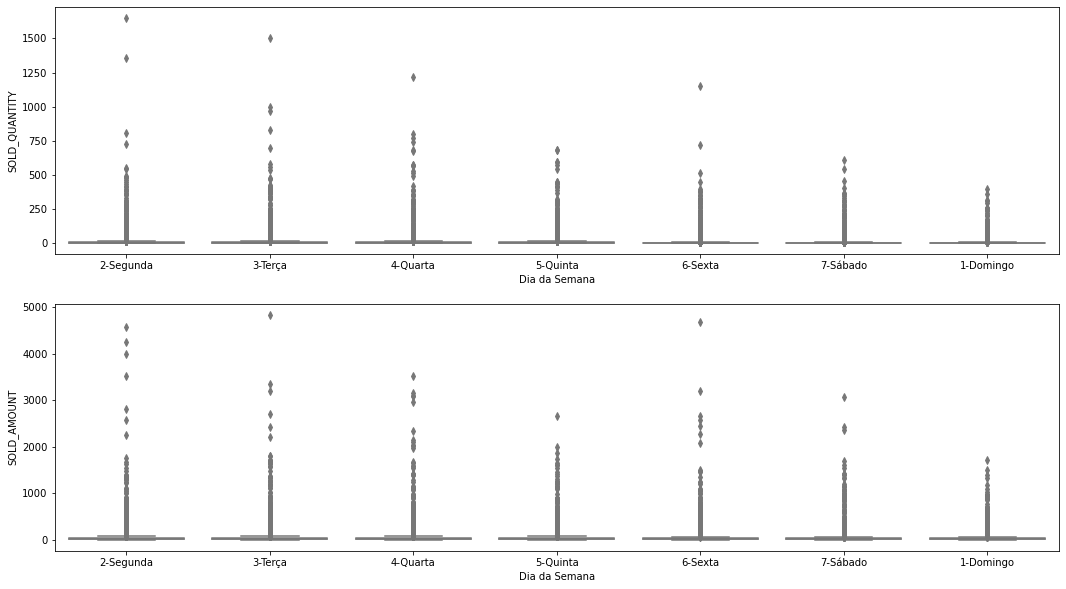

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
sns.boxplot(ax=axes[0], x="Dia da Semana", y="SOLD_QUANTITY", data=ofertas, color='lightsteelblue', order=dias)
sns.boxplot(ax=axes[1], x="Dia da Semana", y="SOLD_AMOUNT", data=ofertas, color='lightsteelblue', order=dias)
#fig.suptitle('Quantidade vendido', fontsize=16)
plt.show()

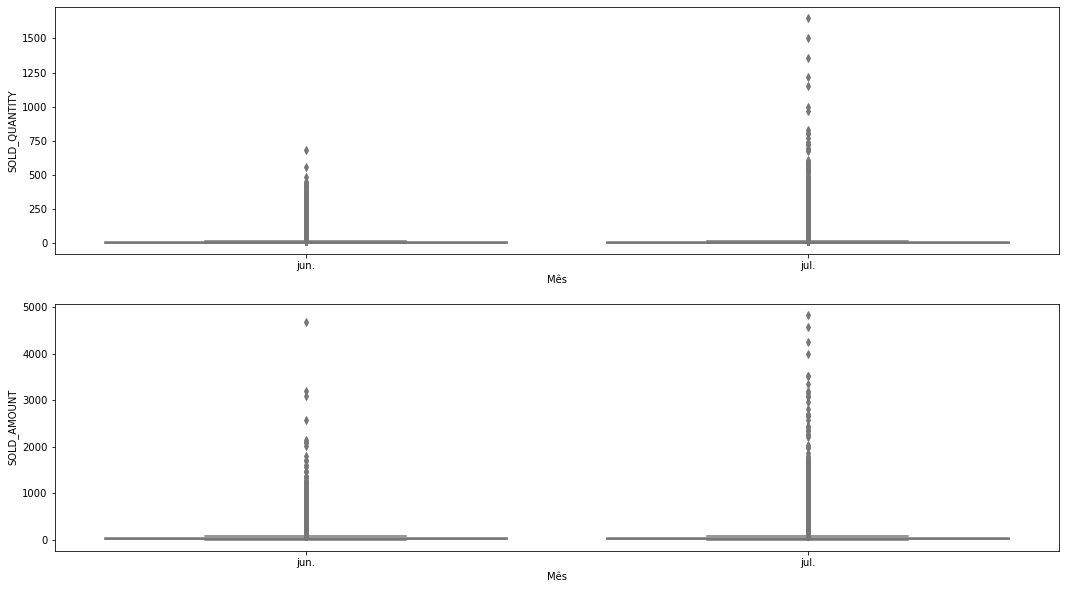

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
sns.boxplot(ax=axes[0], x="Mês", y="SOLD_QUANTITY", data=ofertas, color='lightsteelblue', order= ['jun.','jul.'])
sns.boxplot(ax=axes[1], x="Mês", y="SOLD_AMOUNT", data=ofertas, color='lightsteelblue', order=['jun.','jul.'])
#fig.suptitle('Quantidade vendido', fontsize=16)
plt.show()

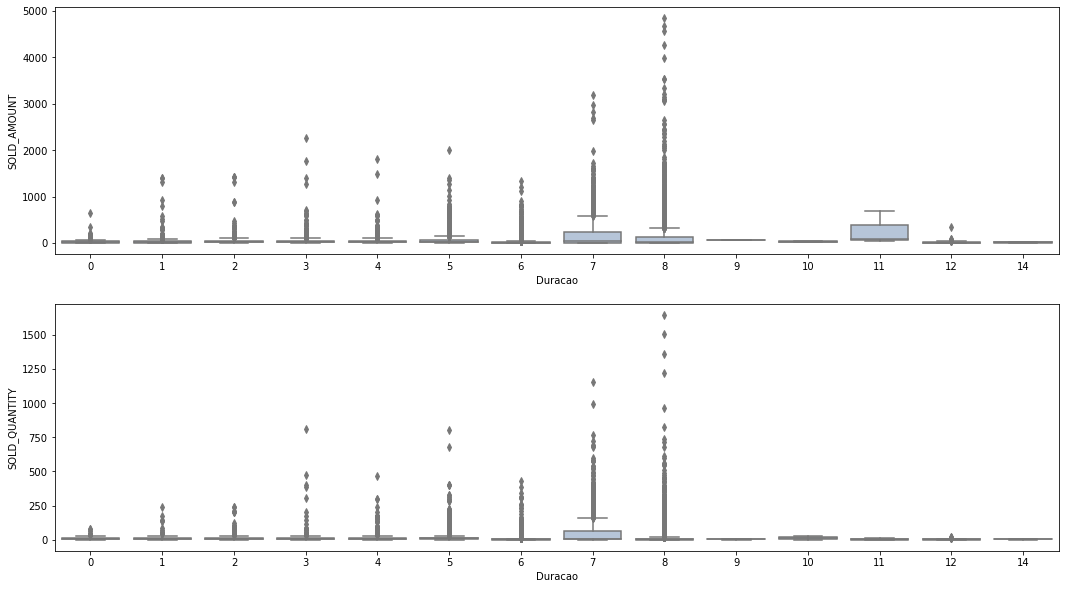

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
sns.boxplot(ax=axes[0], x="Duracao", y="SOLD_AMOUNT", data=ofertas, color='lightsteelblue')
sns.boxplot(ax=axes[1], x="Duracao", y="SOLD_QUANTITY", data=ofertas, color='lightsteelblue')
#fig.suptitle('Valor vendido', fontsize=16)
plt.show()

<font size=2> <p style='text-align: justify;'> Como esperado, nota-se uma grande quantidade de outliers que dificultam a análise da base. Vamos retirá-los.

In [16]:
#Não funcionou :(
def remove_outlier(dados, descritivas):
    for i in descritivas.columns:
        Q1 = descritivas.loc['25%',i]
        Q3 = descritivas.loc['75%',i]
        IQR = Q3 - Q1
        lim_sup = dados[dados[i] >= (Q3+1.5*IQR)].index
        dados.drop(lim_sup, inplace = True).reset_index()
        lim_inf = dados[dados[i] <= (Q1-1.5*IQR)].index
        dados.drop(lim_inf, inplace = True).reset_index()
    return dados

In [17]:
#Como a função acima não funcionou, vamos fazer assim:
#Vemos que existem muitos valores extremos nos dados, vamos verificar a quantidade de registros com valor maior que o percentil 95
for i in descritivas.columns:
    p95 = np.percentile(ofertas[i],95)
    j = ofertas[ofertas[i]>p95].shape[0]
    print(f"O percentil 95 da coluna {i} é {p95} e existem {j} dados acima desse valor para essa coluna")



O percentil 95 da coluna index é 46281.15 e existem 1229 dados acima desse valor para essa coluna
O percentil 95 da coluna INVOLVED_STOCK é 190.0 e existem 1218 dados acima desse valor para essa coluna
O percentil 95 da coluna REMAINING_STOCK_AFTER_END é 140.14999999999782 e existem 1229 dados acima desse valor para essa coluna
O percentil 95 da coluna SOLD_AMOUNT é 197.5194999999997 e existem 1229 dados acima desse valor para essa coluna
O percentil 95 da coluna SOLD_QUANTITY é 25.0 e existem 1216 dados acima desse valor para essa coluna
O percentil 95 da coluna Duracao é 8.0 e existem 124 dados acima desse valor para essa coluna


In [18]:
#Retirando Dados com valores > p95
index = []
for i in descritivas.columns:
    p95 = np.percentile(ofertas[i],95)
    j = ofertas[ofertas[i]>p95].index
    index.append(j)

In [21]:
flat_list = [item for sublist in index for item in sublist]
flat_list = list(set(flat_list))
len(flat_list)

3388

In [22]:
ofertas.drop(ofertas.loc[flat_list].index, inplace = True)

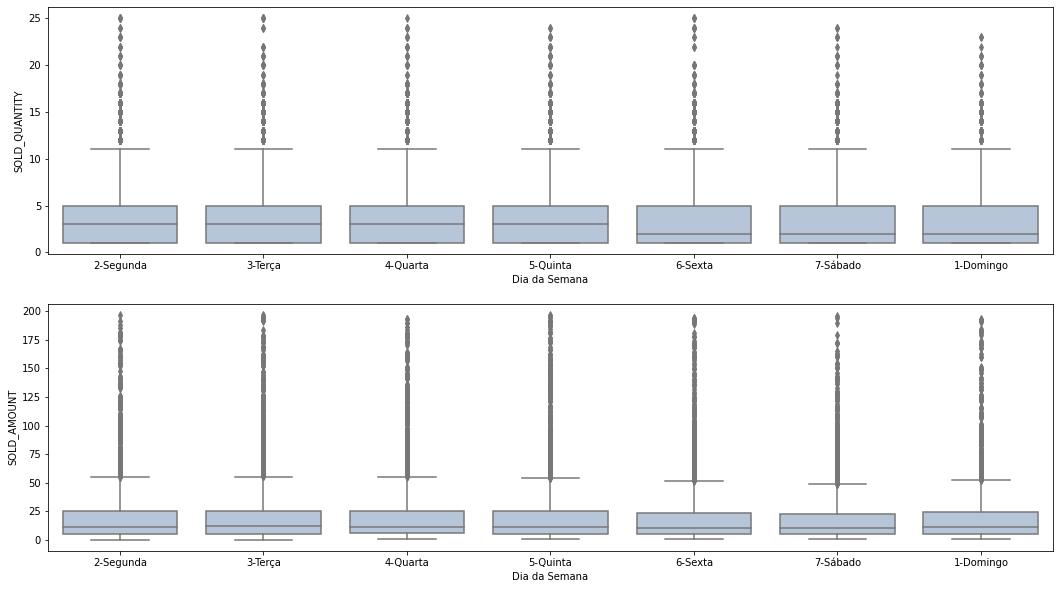

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
sns.boxplot(ax=axes[0], x="Dia da Semana", y="SOLD_QUANTITY", data=ofertas, color='lightsteelblue', order=dias)
sns.boxplot(ax=axes[1], x="Dia da Semana", y="SOLD_AMOUNT", data=ofertas, color='lightsteelblue', order=dias)
#fig.suptitle('Quantidade vendido', fontsize=16)
plt.show()

In [24]:
ofertas.corr()

,index,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,Duracao
index,1.000000,0.014089,0.013379,0.013903,0.001041,0.004613
INVOLVED_STOCK,0.014089,1.000000,0.958411,0.163394,0.170765,0.303655
REMAINING_STOCK_AFTER_END,0.013379,0.958411,1.000000,0.031958,-0.103497,0.425976
SOLD_AMOUNT,0.013903,0.163394,0.031958,1.000000,0.460113,-0.095336
SOLD_QUANTITY,0.001041,0.170765,-0.103497,0.460113,1.000000,-0.394231
Duracao,0.004613,0.303655,0.425976,-0.095336,-0.394231,1.000000


<font size=2> <p style='text-align: justify;'> A quantidade de estoque restante, como esperado, está altamente relacionada à quantidade inicial de estoque, porem para as outras variáveis, nao encontramos relações de alta correlação.

In [27]:
dados_graf = ofertas[['SOLD_AMOUNT','SOLD_QUANTITY', 'Dia da Semana']].groupby(['Dia da Semana']).median().reset_index()

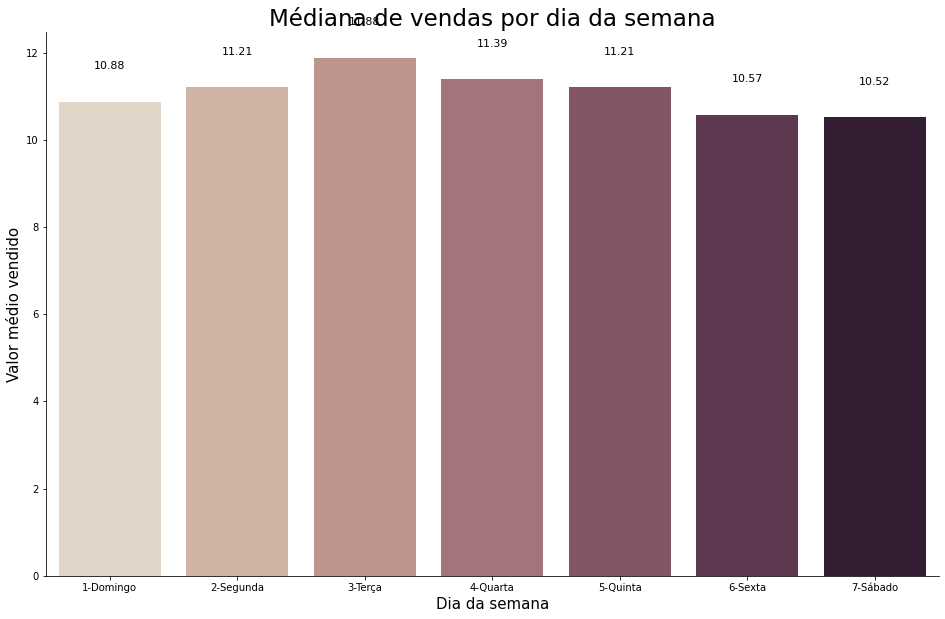

In [29]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=dados_graf, x='Dia da Semana', y= 'SOLD_AMOUNT', palette="ch:.25")
for rect in ax.patches:
    ax.text ((rect.get_x()) + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(),horizontalalignment='center', fontsize = 11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Dia da semana', fontsize = 15)
plt.ylabel('Valor médio vendido', fontsize = 15)
plt.title('Médiana de vendas por dia da semana', fontsize = 23)
plt.show()

<font size=2> <p style='text-align: justify;'> Terça-feira é o dia com a maior mediana de vendas. Usamos aqui a mediana, pois já obsrvamos que existe uma grande quantidade de dados de alto valor, que influeniam diretamente a média.

<font size=2> <p style='text-align: justify;'> Não consegui terminar, mas seguiria as análises vizualizando as variáveis e realizando comparações entre elas.